**Setup (Import library)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline
#DATA MANIPULATION
import numpy as np
import pandas as pd

#DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

#STYLE MANIPULATIONS
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

#MACHINE LEARNING
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [5]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone project/heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
0,75.0000,0,582,0,20,1,265000.0000,1.9000,130,1,0,4,1
1,55.0000,0,7861,0,38,0,263358.0300,1.1000,136,1,0,6,1
2,65.0000,0,146,0,20,0,162000.0000,1.3000,129,1,1,7,1
3,50.0000,1,111,0,20,0,210000.0000,1.9000,137,1,0,7,1
4,65.0000,1,160,1,20,0,327000.0000,2.7000,116,0,0,8,1


,count
int64,10
float64,3


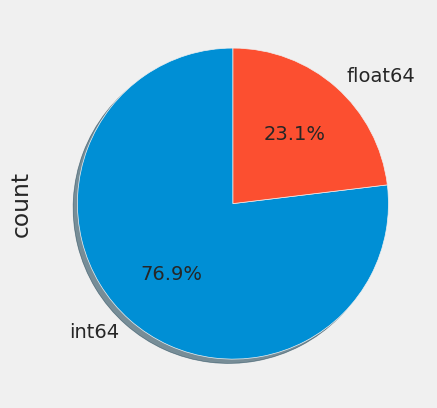

In [7]:
#VARIABLES TYPES
df.dtypes.value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90)
df.dtypes.value_counts()


In [8]:
#Take AN IDEA ABOUT THE DATA

df.shape

(299, 13)

In [9]:
#Check missing data
df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [10]:
#A DESCRIPTION ABOUT THE DATA :
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
count,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000
mean,60.8339,0.4314,581.8395,0.4181,38.0836,0.3512,263358.0293,1.3939,136.6254,0.6488,0.3211,130.2609,0.3211
std,11.8948,0.4961,970.2879,0.4941,11.8348,0.4781,97804.2369,1.0345,4.4125,0.4781,0.4677,77.6142,0.4677
min,40.0000,0.0000,23.0000,0.0000,14.0000,0.0000,25100.0000,0.5000,113.0000,0.0000,0.0000,4.0000,0.0000
25%,51.0000,0.0000,116.5000,0.0000,30.0000,0.0000,212500.0000,0.9000,134.0000,0.0000,0.0000,73.0000,0.0000
50%,60.0000,0.0000,250.0000,0.0000,38.0000,0.0000,262000.0000,1.1000,137.0000,1.0000,0.0000,115.0000,0.0000
75%,70.0000,1.0000,582.0000,1.0000,45.0000,1.0000,303500.0000,1.4000,140.0000,1.0000,1.0000,203.0000,1.0000
max,95.0000,1.0000,7861.0000,1.0000,80.0000,1.0000,850000.0000,9.4000,148.0000,1.0000,1.0000,285.0000,1.0000


In [11]:
#KNOWING THE VARIABLES BETTER:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("----------------------------------------------------------")

age: Number of unique values 47
----------------------------------------------------------
anaemia: Number of unique values 2
----------------------------------------------------------
creatinine_phosphokinase: Number of unique values 208
----------------------------------------------------------
diabetes: Number of unique values 2
----------------------------------------------------------
ejection_fraction: Number of unique values 17
----------------------------------------------------------
high_blood_pressure: Number of unique values 2
----------------------------------------------------------
platelets: Number of unique values 176
----------------------------------------------------------
serum_creatinine: Number of unique values 40
----------------------------------------------------------
serum_sodium: Number of unique values 27
----------------------------------------------------------
sex: Number of unique values 2
----------------------------------------------------------
smok

In [12]:
df.apply(np.max)

,0
age,95.0000
anaemia,1.0000
creatinine_phosphokinase,7861.0000
diabetes,1.0000
ejection_fraction,80.0000
high_blood_pressure,1.0000
platelets,850000.0000
serum_creatinine,9.4000
serum_sodium,148.0000
sex,1.0000


In [13]:
columns_to_show = ["diabetes", "high_blood_pressure", "anaemia"]

df.groupby(["Death_event"])[columns_to_show].describe(percentiles=[])

diabetes                                    high_blood_pressure  \
               count   mean    std    min    50%    max               count   
Death_event                                                                   
0           203.0000 0.4187 0.4946 0.0000 0.0000 1.0000            203.0000   
1            96.0000 0.4167 0.4956 0.0000 0.0000 1.0000             96.0000   

                                                anaemia                       \
              mean    std    min    50%    max    count   mean    std    min   
Death_event                                                                    
0           0.3251 0.4696 0.0000 0.0000 1.0000 203.0000 0.4089 0.4928 0.0000   
1           0.4062 0.4937 0.0000 0.0000 1.0000  96.0000 0.4792 0.5022 0.0000   

                           
               50%    max  
Death_event                
0           0.0000 1.0000  
1           0.0000 1.0000

In [14]:
pd.crosstab(df["Death_event"], df["sex"]) #0:male and 1:female

sex,0,1
Death_event,,
0,71,132
1,34,62


In [15]:
cnt=df.groupby(['Death_event','smoking']).size() #0:male and 1:female
print(cnt)

Death_event  smoking
0            0          137
             1           66
1            0           66
             1           30
dtype: int64


# DATA VISUALIZATION :

<Axes: xlabel='high_blood_pressure', ylabel='count'>

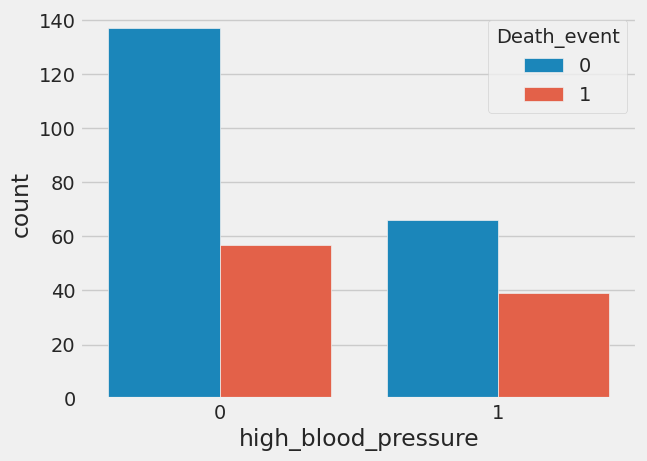

In [16]:
sns.countplot(x="high_blood_pressure", hue="Death_event", data=df)

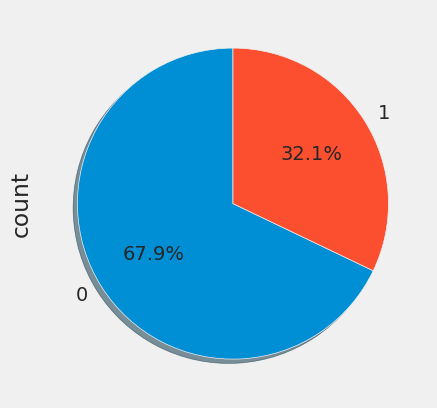

In [17]:
# DEATH_EVENT VISUALIZATION:
target="Death_event"
df[target].value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

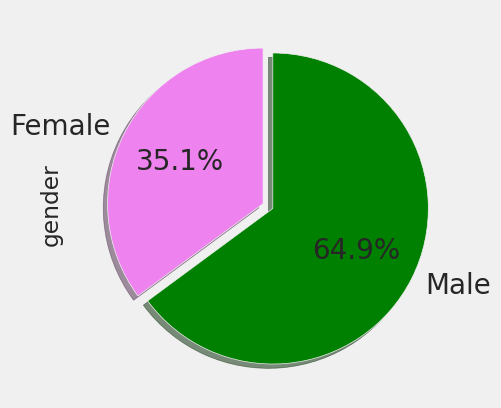

In [18]:
explode = (0, 0.07)
labels = ['Female', 'Male']
df.groupby('sex').size().plot(kind='pie',textprops={'fontsize': 20}, colors=['violet', 'green'],explode=explode,startangle=90,labels=labels,autopct='%1.1f%%',shadow=True,label='gender')
plt.show()

<Axes: ylabel='Death_event'>

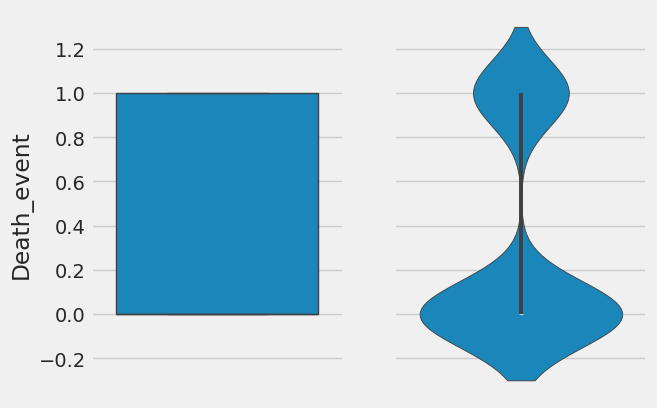

In [19]:
_, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=df["Death_event"], ax=axes[0])
sns.violinplot(data=df["Death_event"], ax=axes[1])

<Axes: >

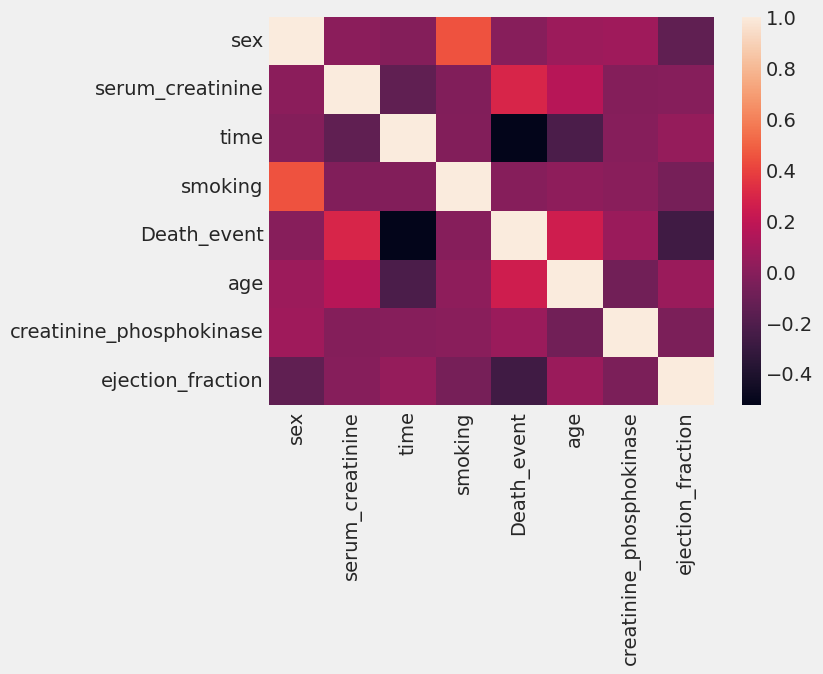

In [20]:
#Correlation matrix

item = list(
    set(df.columns)
    - {
        "anaemia",
        "diabetes",
        "high_blood_pressure",
        "platelets",
        "serum_sodium",
    }
)

# Calculate and plot
corr_matrix = df[item].corr()
sns.heatmap(corr_matrix)

# DATA PREPROCESSING :

**SPLIT THE DATA**

In [21]:
# Univariate feature selection
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df.drop(['Death_event'], axis=1)
y = df['Death_event']

X_new = SelectKBest(chi2, k=4).fit_transform(x, y)

print(x.shape)
print(X_new.shape)

(299, 12)
(299, 4)


In [22]:

#SPLIT
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_new,y, test_size=0.2)
ytrain = ytrain.ravel()
ytest = ytest.ravel()


print("Train:", xtrain.shape, ytrain.shape)
print("Test:", xtest.shape, ytest.shape)


Train: (239, 4) (239,)
Test: (60, 4) (60,)


/tmp/ipython-input-1355997691.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ytrain = ytrain.ravel()
/tmp/ipython-input-1355997691.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ytest = ytest.ravel()


# BUILDING THE MODEL :

### LOGISTIC REGRESSION:

In [23]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(xtrain,ytrain)

#SCORE
score = lr_model.score(xtest,ytest)
print("Score: ",score)

Score:  0.8166666666666667


In [24]:
#COEFFICIENT
print(lr_model.coef_, lr_model.intercept_)

[[ 1.32526488e-04 -6.60768625e-02 -2.89175413e-06 -2.04440671e-02]] [4.6304608]


### RandomForestClassifier:

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain,ytrain)

#SCORE
score = rf_model.score(xtest,ytest)
print("Score: ", score)

Score:  0.8833333333333333


In [26]:
cross_val_score(RandomForestClassifier(), xtrain, ytrain,cv=5,scoring='accuracy')

array([0.83333333, 0.77083333, 0.91666667, 0.8125    , 0.85106383])

In [27]:
#ACCURACY MEAN:
cross_val_score(RandomForestClassifier(), xtrain, ytrain,cv=5,scoring='accuracy').mean()

np.float64(0.8200354609929077)

### Naive Bayes:

In [28]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(xtrain, ytrain)

#SCORE
score = nb_model.score(xtest,ytest)
print("Score: ", score)

Score:  0.8


### KNeighborsClassifier:

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(xtrain,ytrain)

#SCORE
score = knn_model.score(xtest,ytest)
print("Score: ", score)

Score:  0.6666666666666666


# VotingClassifier

In [30]:
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(max_iter=500)
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier(n_neighbors=3)
clf4 = GaussianNB()

eclf1 = (VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3), ('nb', clf4)], voting='hard'))
eclf1.fit(xtrain, ytrain)

eclf1_train_score = eclf1.score(xtrain, ytrain)
eclf1_test_score = eclf1.score(xtest, ytest)

print("Train score:", eclf1_train_score)
print("Test score:", eclf1_test_score)



Train score: 0.8661087866108786
Test score: 0.8333333333333334


In [31]:
from sklearn.metrics import confusion_matrix

y_pred = eclf1.predict(xtest)
confusion_matrix(ytest, y_pred)

array([[41,  0],
       [10,  9]])

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Logistic regression
y_pred = lr_model.predict(xtest)

print("Accuracy:", format(accuracy_score(ytest, y_pred) , ".2f"))
print("Precision:", format(precision_score(ytest, y_pred, average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest, y_pred, average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest, y_pred, average='macro'), ".2f"))

Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.77


In [33]:
#Random Forest
y_pred = rf_model.predict(xtest)

print("Accuracy:", format(accuracy_score(ytest, y_pred) , ".2f"))
print("Precision:", format(precision_score(ytest, y_pred, average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest, y_pred, average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest, y_pred, average='macro'), ".2f"))

Accuracy: 0.88
Precision: 0.90
Recall: 0.88
F1 Score: 0.85


In [34]:
#Naive bayes
y_pred = nb_model.predict(xtest)

print("Accuracy:", format(accuracy_score(ytest, y_pred) , ".2f"))
print("Precision:", format(precision_score(ytest, y_pred, average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest, y_pred, average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest, y_pred, average='macro'), ".2f"))

Accuracy: 0.80
Precision: 0.84
Recall: 0.80
F1 Score: 0.72


In [35]:
#KNeighborsClassifier
y_pred = knn_model.predict(xtest)

print("Accuracy:", format(accuracy_score(ytest, y_pred) , ".2f"))
print("Precision:", format(precision_score(ytest, y_pred, average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest, y_pred, average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest, y_pred, average='macro'), ".2f"))

Accuracy: 0.67
Precision: 0.34
Recall: 0.67
F1 Score: 0.40


In [36]:
#Voting classifier
y_pred = eclf1.predict(xtest)

print("Accuracy:", format(accuracy_score(ytest, y_pred) , ".2f"))
print("Precision:", format(precision_score(ytest, y_pred, average='macro', zero_division=0), ".2f"))
print("Recall:", format(recall_score(ytest, y_pred, average='micro'), ".2f"))
print("F1 Score:", format(f1_score(ytest, y_pred, average='macro'), ".2f"))

Accuracy: 0.83
Precision: 0.90
Recall: 0.83
F1 Score: 0.77
